In [1]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
digits = load_digits()

Text(0.5, 1.0, 'Label: 0\n')

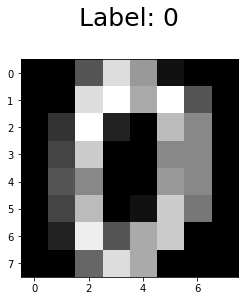

In [4]:
plt.imshow(np.reshape(digits.data[0], (8, 8)), cmap='gray')
plt.title('Label: %i\n' % digits.target[0], fontsize=25)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

In [6]:
KNN = KNeighborsClassifier(n_neighbors=6)
# First, I try to use default value 5, the knn accuracy and recall is good.
# When I change n_neighbours parameter to 3, the performance is not better than before.
# Because when we decrease the parameter value, the model will be overfitting.
# Then I increase the parameter to 6, the performance is better than the model which use the default parameter.
# But when I continue to increase this value, the performance is not better than before.
SGD = SGDClassifier()
DT = DecisionTreeClassifier()

In [7]:
KNN.fit(X_train, y_train)
SGD.fit(X_train, y_train)
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
y_pred_knn = KNN.predict(X_test)
y_pred_sgd = SGD.predict(X_test)
y_pred_dt = DT.predict(X_test)

In [9]:
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_recall = metrics.recall_score(y_test, y_pred_knn, average='macro')
knn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
sgd_accuracy = metrics.accuracy_score(y_test, y_pred_sgd)
sgd_recall = metrics.recall_score(y_test, y_pred_sgd, average='macro')
sgd_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_sgd)
dt_accuracy = metrics.accuracy_score(y_test, y_pred_dt)
dt_recall = metrics.recall_score(y_test, y_pred_dt, average='macro')
dt_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

In [10]:
print('COMP9517 Week 5 Lab - z5178114')
print('')
print('Test size = 0.25')
print(f'KNN Accuracy:  {round(knn_accuracy, 3)}    Recall: {round(knn_recall, 3)}')
print(f'SGD Accuracy:  {round(sgd_accuracy, 3)}    Recall: {round(sgd_recall, 3)}')
print(f'DT Accuracy:   {round(dt_accuracy, 3)}    Recall: {round(dt_recall, 3)}')
print('')
print('KNN Confusion Matrix:')
print(knn_confusion_matrix)

COMP9517 Week 5 Lab - z5178114

Test size = 0.25
KNN Accuracy:  0.996    Recall: 0.996
SGD Accuracy:  0.962    Recall: 0.963
DT Accuracy:   0.869    Recall: 0.865

KNN Confusion Matrix:
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  0  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  1  1  0  0  0 46]]
